# Final Project Submission

* Student name: Heath Rittler
* Student pace: Self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@heathlikethecandybar/

# Introduction

## Business Case/ Summary

SyriaTel, a telecommunications company wants to identify the leading factors of why a customer cancels their service.  This is also referred to as 'Churn.'  If they understand the factors that lead to churn, the company can implement programs to reduce the risk of churn, and increase the lifetime value of and for their customers.

My goal is to build a classifer to predict whether a customer will stop doing business with SyriaTel using information such as usage, interactions with SyriaTel, and certain features that the customer has purchased.  I am mostly focused on reducing the rate of false negatives.

## Core Field Names and Definitions from Data Source

https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

* `state`- The state in which the account owner resides.
* `account length` - 
* `area code` - Primary 3 digit area of the line for the account.
* `phone number` - Primary 7 digit area of the line for the account.
* `international plan` - Indicator denoting whether or not the account has an international feature.
* `voice mail plan` - Indicator denoting whether or not the account has an voice mail feature.
* `number vmail messages` - Usage metric counting the total number of voicemails for the phone number in question.
* `total day minutes` - Usage metric indicating how many minutes (call time) were used between 6:00am and 5:00pm.
* `total day calls` - Usage metric indicating how many calls were used between 6:00am and 5:00pm. 
* `total day charge` - Usage metric indicating how much the user was charged for their usage between 6:00am and 5:00pm.
* `total eve minutes` - Usage metric indicating how many minutes (call time) were used between 5:01pm and 8:00pm.
* `total eve calls` - Usage metric indicating how many calls were used between 5:01pm and 8:00pm. 
* `total eve charge` - Usage metric indicating how much the user was charged for their usage between 5:01pm and 8:00pm.
* `total night minutes` - Usage metric indicating how many minutes (call time) were used between 8:01pm and 5:59am.
* `total night calls` - Usage metric indicating how many calls were used between 8:01pm and 5:59am.
* `total night charge` - Usage metric indicating how much the user was charged for their usage between 8:01pm and 5:59a.
* `total intl minutes` - Usage metric indicating how many minutes (call time) were used internationally.
* `total intl calls` - Usage metric indicating how many calls were made internationally.
* `total intl charge` - Usage metric indicating how much the user was charged for their international call usage.
* `customer service calls` - The total number of customer service calls made by the user to the Skyvia Customer Service line.
* `churn` - Our target category indicating whether or not the customer churned/ cancelled their plan.

# Data Load, Cleaning

## Importing Packages

In [3]:
# Importing packages for analysis

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

lr = LinearRegression()
plt.style.use('seaborn-talk')
import sklearn.metrics as metrics


%matplotlib inline

## Choosing Colors & Templates

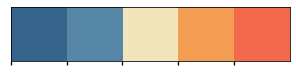

In [4]:
# Choosing standard colors for project

pal = ['#37648C',
        '#5687A6',
        '#F2E4BB',
        '#F29D52',
        '#F26A4B']

color_codes = ['darkblue', 'blue', 'beige', 'orange', 'redorange']

c = lambda x: pal[color_codes.index(x)]

sns.palplot(sns.color_palette(pal))

div = []

## Import data

In [5]:
# Importing data and viewing the first 5 rows

df = pd.read_csv('data.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Updating column names to have an _ vs a space

df.columns = [c.replace(' ', '_') for c in df.columns]

In [7]:
# Taking a quick peak at our datatypes for any transformations needed.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Looks like we have a few categorical variables in which we will need to encode.  Well look at that here in a bit.  First I want to make sure our dataset is complete. Moving on to checking to see if we need to remove or impute any data before any transformations.

In [8]:
# Checking for missing values.

df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

No missing values. Going to create some columns to add together all of our minutes, calls, and charges.  We might be able to reduce the number of dimensions we have if the customer is not using the plan at all.  We may drop these later, but let's add them while we are in the mood.

In [9]:
# Adding column for total calls

df['total_calls'] = (df['total_day_calls'] +
                    df['total_eve_calls'] + 
                    df['total_night_calls'] + 
                    df['total_intl_calls']
                    )

In [10]:
# Adding column for total minutes

df['total_charges'] = (df['total_day_charge'] + 
                    df['total_eve_charge'] + 
                    df['total_night_charge'] + 
                    df['total_intl_charge']
                      )

In [11]:
# Adding column for total charges

df['total_minutes'] = (df['total_day_minutes'] + 
                    df['total_eve_minutes'] + 
                    df['total_night_minutes'] + 
                    df['total_intl_minutes']
                      )

In [12]:
df['price_per_minute'] = df['total_day_charge']/df['total_minutes']

In [13]:
# Quick check to make sure our columns were added correctly and math checks out

df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_charges,total_minutes,price_per_minute
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,False,303,75.56,717.2,0.062842
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,False,332,59.24,625.2,0.043938
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,False,333,62.29,539.4,0.076715
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,False,255,66.80,564.8,0.090120
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,False,359,52.09,512.0,0.055352


Going to look at some summary statistics of the dataset based on where we are at.

In [14]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_calls,total_charges,total_minutes,price_per_minute
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,305.137114,59.449754,591.864776,0.051355
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,34.448164,10.502261,89.954251,0.013085
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,191.000000,22.930000,284.300000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,282.000000,52.380000,531.500000,0.042939
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,305.000000,59.470000,593.600000,0.051557
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,328.000000,66.480000,652.400000,0.060121
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,416.000000,96.150000,885.000000,0.096748


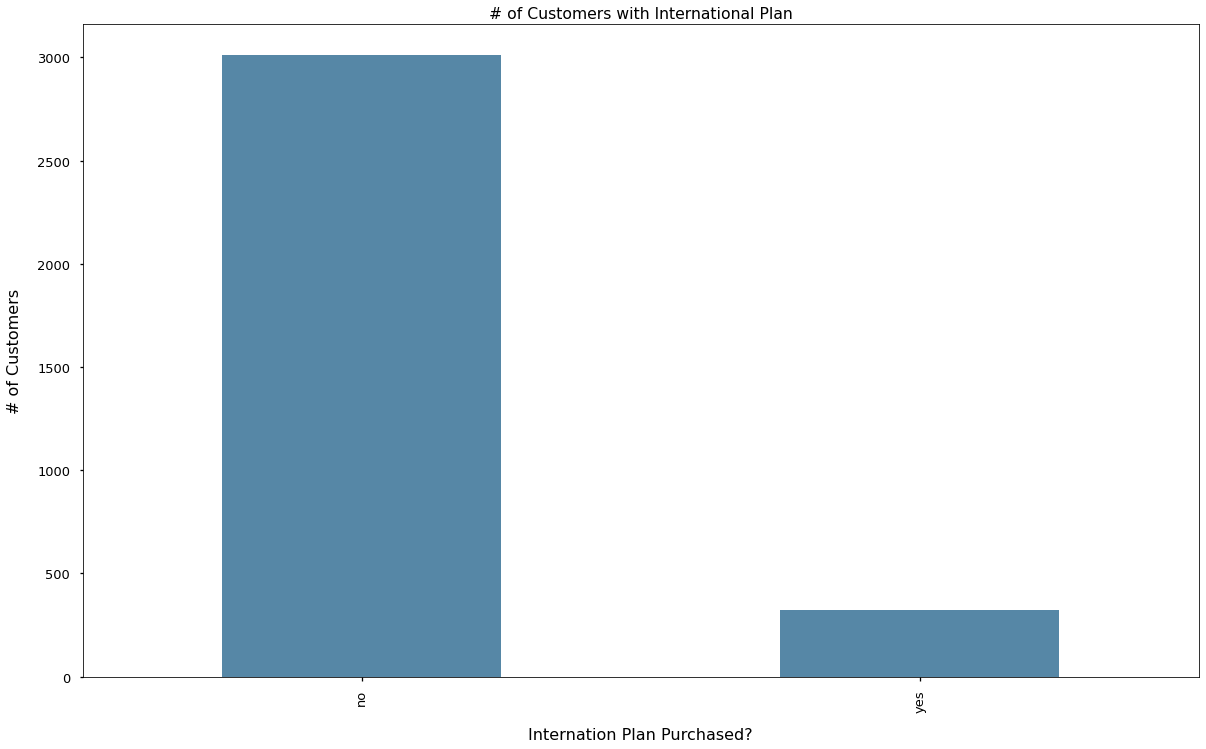

In [15]:
fix, ax = plt.subplots(figsize=(20,12))

df['international_plan'].value_counts().plot(kind='bar', color=c('blue'))

ax.set_title('# of Customers with International Plan')
ax.set_xlabel('Internation Plan Purchased?', labelpad=15, fontsize=16)
ax.set_ylabel('# of Customers', labelpad=15, fontsize=16)

plt.show()

There are 323 accounts that purchased a international plan (roughly 10% of customers.). Going to take a look to see if churn within the international accounts is similar to those accounts that did not purchase international plans.

In [16]:
# Checking our target/ dataset for balance before creating our baseline classifcation model.

pd.pivot_table(df, 
               values='account_length', 
               index='international_plan', 
               columns='churn',
               aggfunc='count'
              )

churn,False,True
international_plan,,
no,2664,346
yes,186,137


International plans experience a higher churn percentage than those without.  Going to remove those international plans as it is a small percentage of my overall records (roughly 10%).  We can always come back to these if necessary.  Going to also look at voice mail plans.  However, according to this, about 1/3 of the churn that was experienced were customers that had purchased the international plan.


In [17]:
# Creating pivot table for voice mail plan vs churn.

pd.pivot_table(df, 
               values='account_length', 
               index='voice_mail_plan', 
               columns='churn',
               aggfunc='count'
              )

churn,False,True
voice_mail_plan,,
no,2008,403
yes,842,80


Looks like those plans with a voice mail plan have a lower churn percentage than those without. 10% of those with the voice mail plan vs 20% of those without a voice mail plan churn.  We will keep this in mind as we complete our analyses.  We could always remove later.


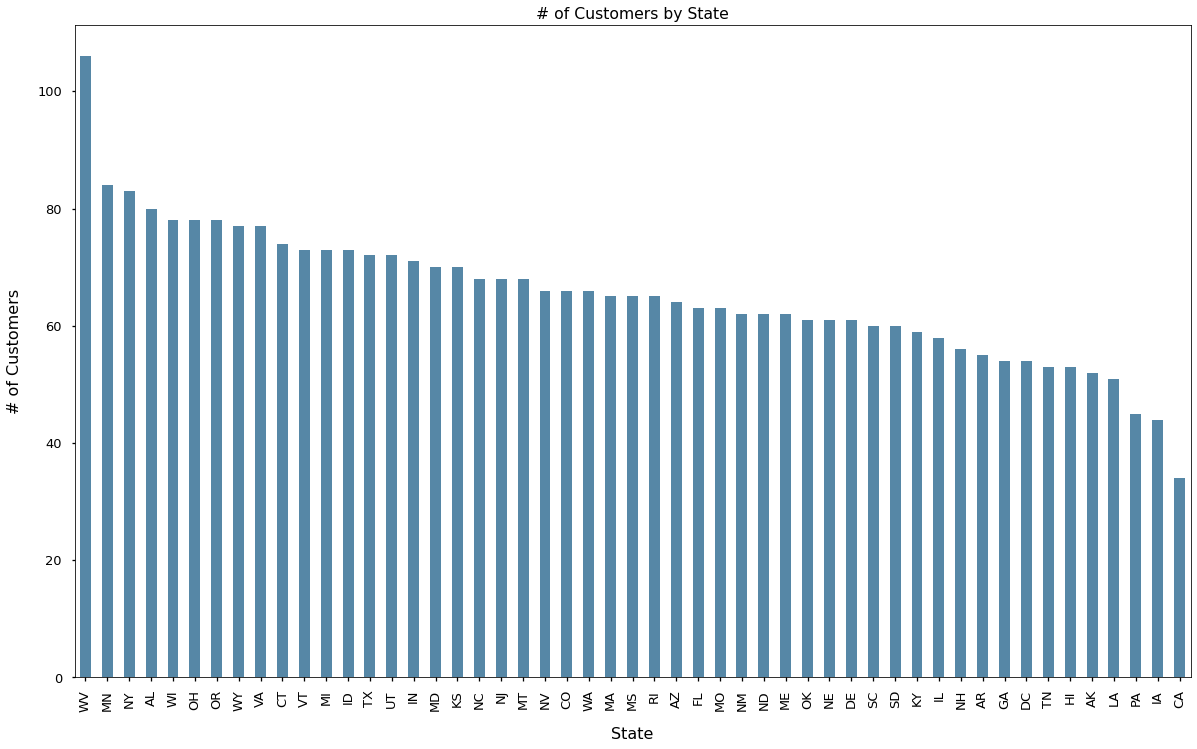

In [18]:
fix, ax = plt.subplots(figsize=(20,12))

df['state'].value_counts().plot(kind='bar', color=c('blue'))

ax.set_title('# of Customers by State')
ax.set_xlabel('State', labelpad=15, fontsize=16)
ax.set_ylabel('# of Customers', labelpad= 15, fontsize=16)

plt.show()

Overall the distribution of states is pretty good!  No concerns here, however we will need to encode this categorical column if we want to retain this information.

In [19]:
# Since we are thinking about dropping our state column, we still have area_code, and our phone_number_prefix,
# to give us an idea of where the users are located.  Going to split those columns out from the line_number,
# which won't really help us.

df[['phone_number_prefix','line_number']] = df.phone_number.str.split("-",expand=True,).astype(int)
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_charges,total_minutes,price_per_minute,phone_number_prefix,line_number
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,3,2.70,1,False,303,75.56,717.2,0.062842,382,4657
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,3,3.70,1,False,332,59.24,625.2,0.043938,371,7191
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,5,3.29,0,False,333,62.29,539.4,0.076715,358,1921
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,7,1.78,2,False,255,66.80,564.8,0.090120,375,9999
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,3,2.73,3,False,359,52.09,512.0,0.055352,330,6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,6,2.67,2,False,292,60.10,660.7,0.040185,414,4276
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,4,2.59,3,False,239,63.53,585.4,0.067117,370,3271
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,6,3.81,2,False,264,67.74,675.6,0.045500,328,8230
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,10,1.35,2,False,336,57.53,517.6,0.070228,364,6381


In [20]:
# dropping state, and phone number

df = df.drop(['state',
              'phone_number', 
              'line_number'
             ], 
             axis=1
            )

In [21]:
# Going back to look at our columns that need transformed from string to integer // international plan

df = df.replace({'international_plan': 
                 {'yes': 1, 
                  'no': 0
                 }
                }
               )

In [22]:
# Going back to look at our columns that need transformed from string to integer // voice mail plan

df = df.replace({'voice_mail_plan': 
                 {'yes': 1, 
                  'no': 0
                 }
                }
               )

In [23]:
# Going back to look at our columns that need transformed from string to integer // voice mail plan

df['churn'] = df['churn'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

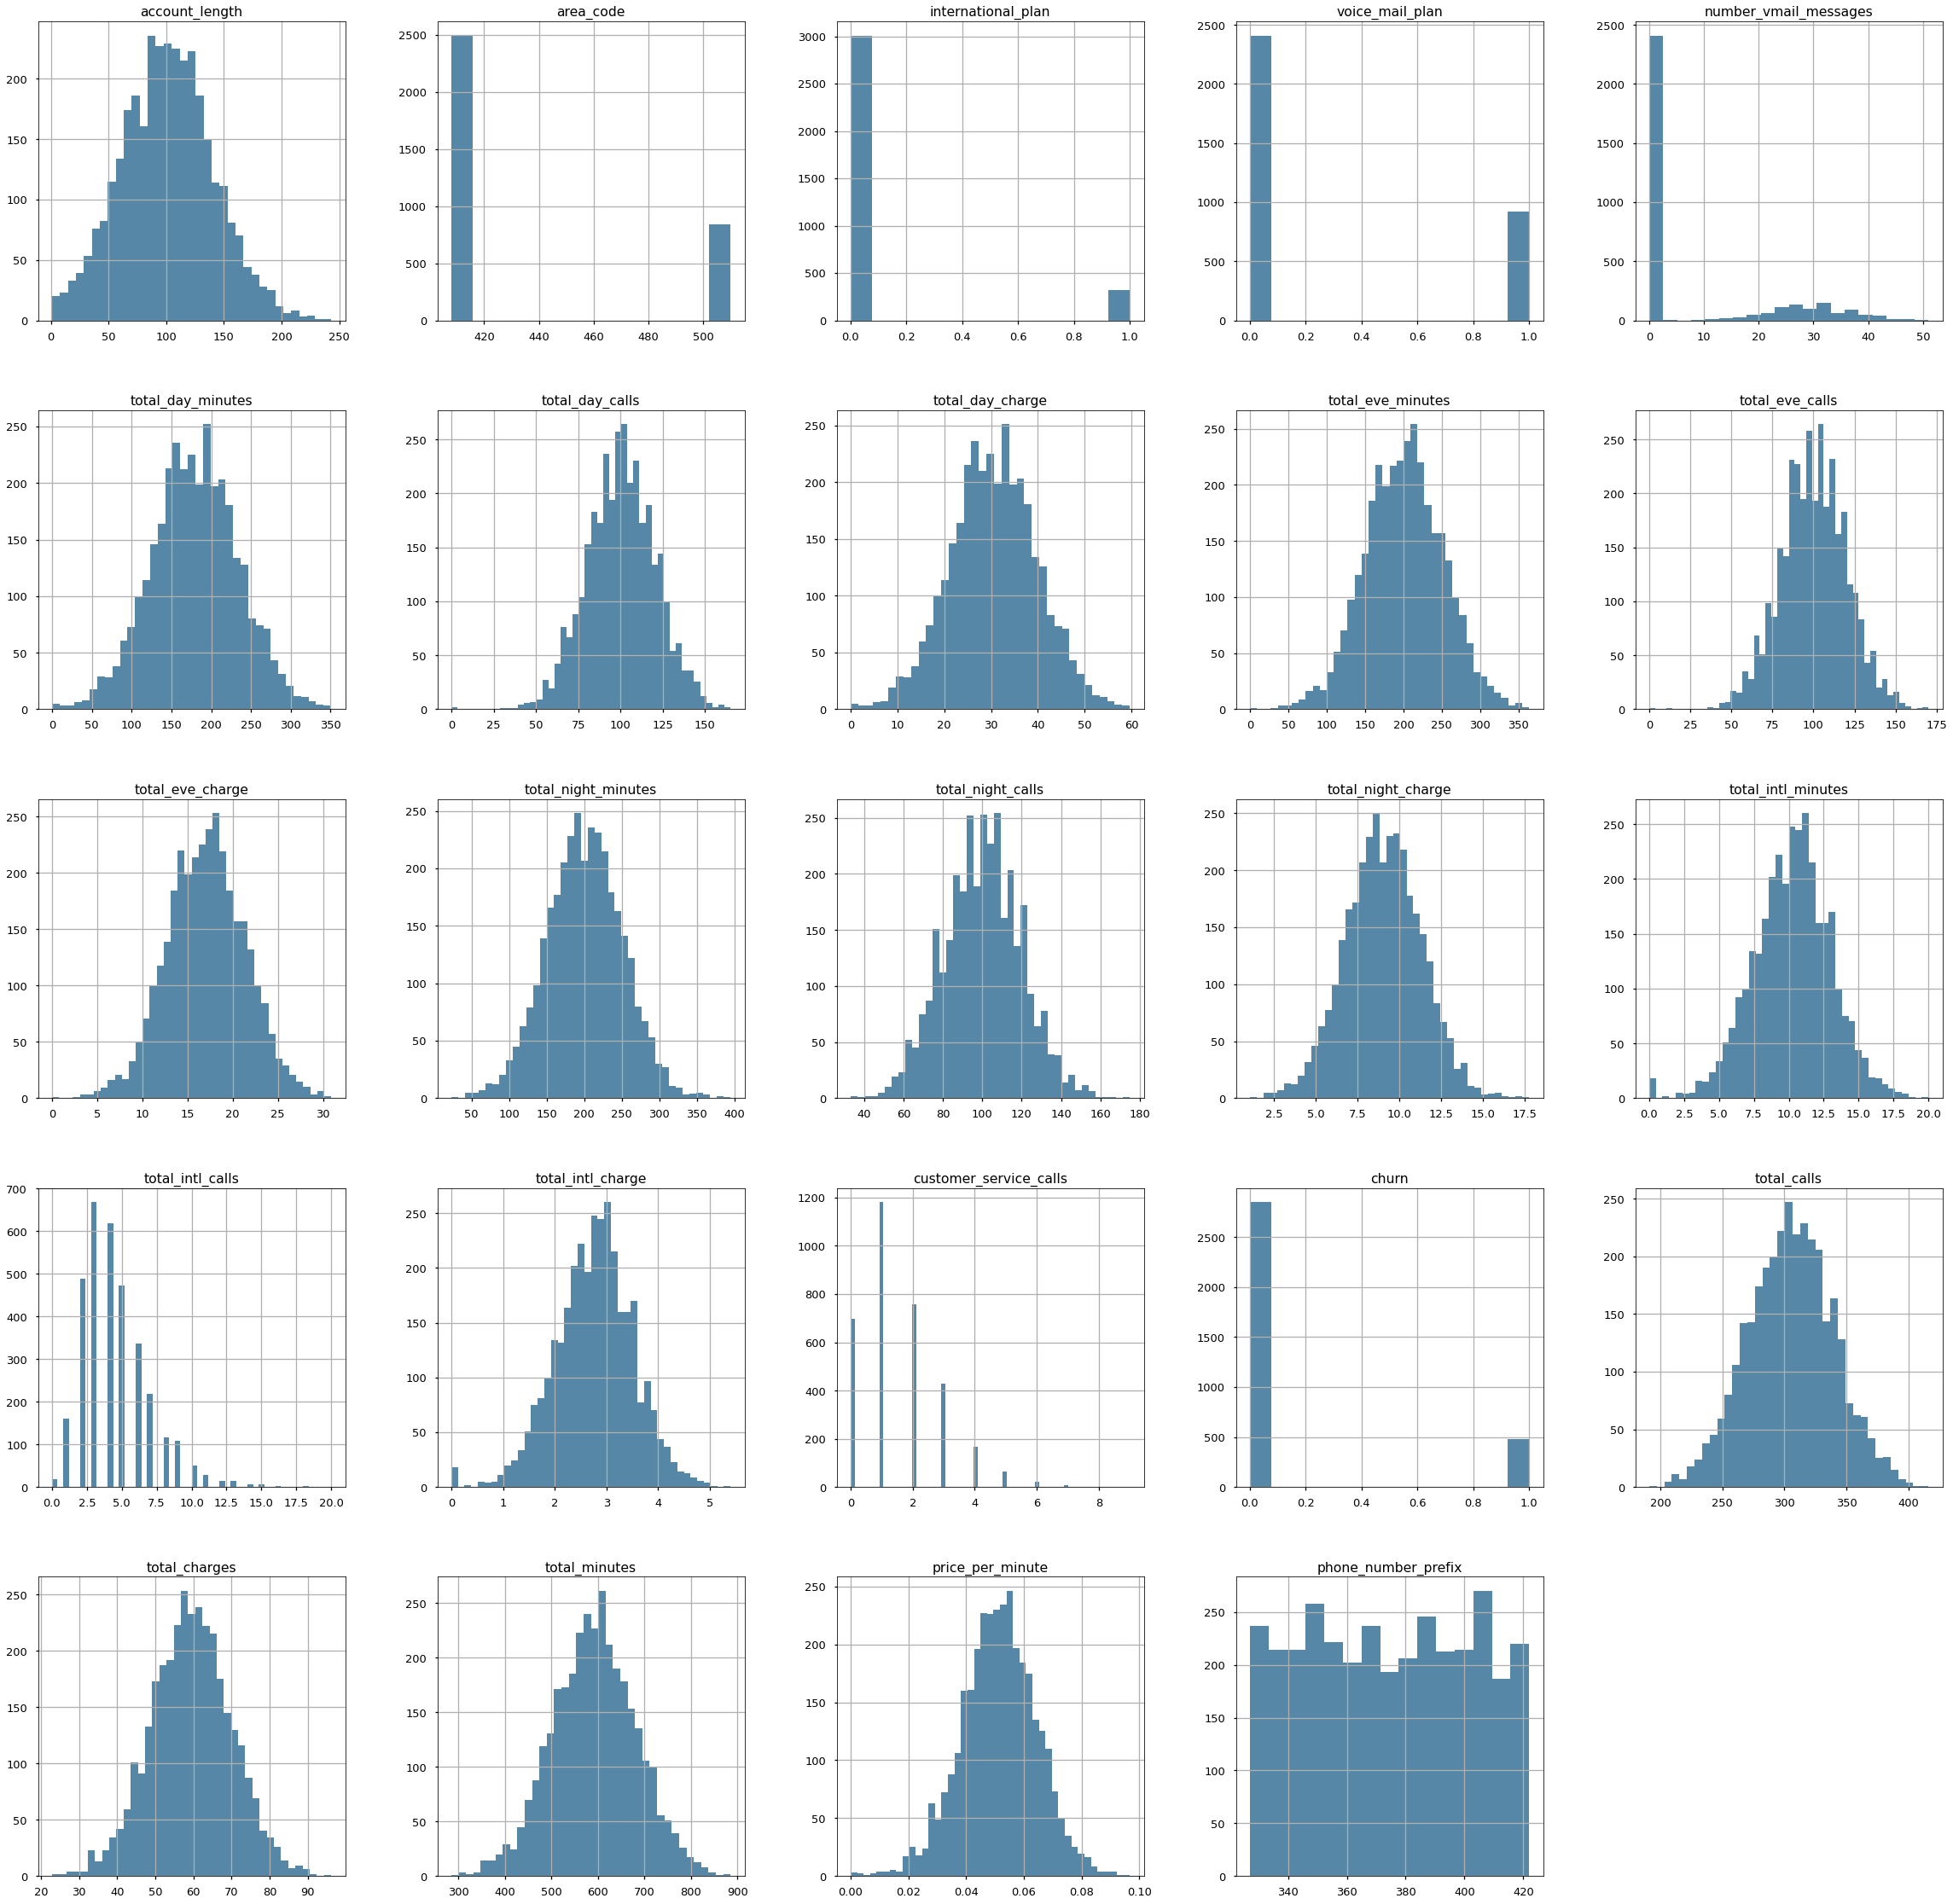

In [25]:
# Going to look at overall distribution and histograms to visually inspect our data

df.hist(bins='auto', 
        figsize=(40,40),
        color=c('blue')
       );

In [26]:
# Before summarizing the table above, I am going to take a peek at the area code column vs the prefix columns.

df['area_code'].value_counts()


pd.pivot_table(df, 
               values='account_length', 
               index='area_code', 
               columns='phone_number_prefix',
               aggfunc='count'
              )

phone_number_prefix,327,328,329,330,331,332,333,334,335,336,...,413,414,415,416,417,418,419,420,421,422
area_code,,,,,,,,,,,,,,,,,,,,,
408,3,9,9,5,6,12,13,11,10,14,...,6,4,10,10,15,6,6,9,5,7
415,10,12,17,20,10,21,25,20,16,20,...,12,15,21,22,21,21,13,18,13,9
510,6,11,11,9,9,11,8,7,8,7,...,10,10,5,5,10,5,8,8,6,3


The histograms above show a pretty good distribution of values across the board.  We only have 3 area codes for the all the prefixes that we see.  We may want to encode this category since it is categorical feature.  I will also encode the phone number prefix, and the state columns before running any models.  Going to continue to review.

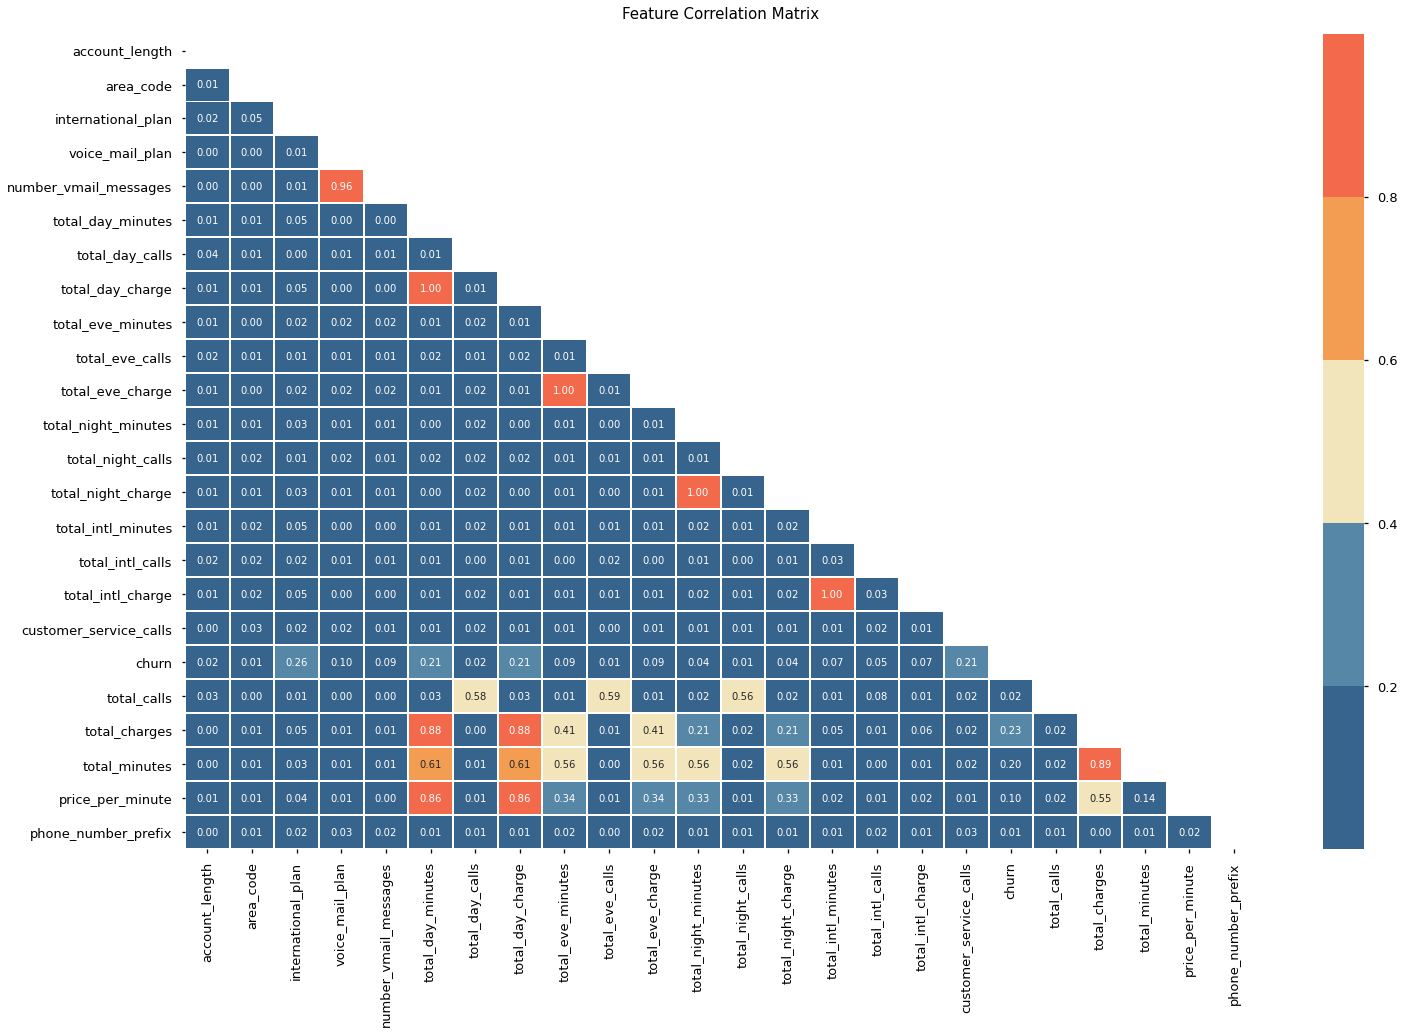

In [27]:
# Creating a heatmap to look at colinearity and potential categories that will lead to churn prediction.

corr = df.corr().abs()

fix, ax = plt.subplots(figsize = (24,15))
matrix = np.triu(corr)
ax.set_title('Feature Correlation Matrix', pad=15, fontsize=15)
heatmap = sns.heatmap(corr, annot=True, cmap=pal, fmt='.2f', mask=matrix, linewidths=1)
plt.show()

Charges and total minutes are perfectly correlated, which makes sense.  I wonder if the price per minute is the same for all customers, or if it is different.  Also the number of voicemail messages, and the voice mail plan category are also highly correlated.  Meaning if they purchased the plan, it is highly likely that they used it.  Day minutes were highly correlated with the total minutes vs evening minutes.  It looks like churn had the highest correlation with the international plan (which we identified as a possibility earlier).  Total day minutes, total day charges, and customer service calls.  Customer service calls could be related to the actual service that the customer experienced, or could be the fact that the customer had to call in to cancel their plan, thus driving that columns correlation higher.

In [28]:
# Checking our target/ dataset for balance before creating our baseline classifcation model.

print('Raw Counts')
print(df['churn'].value_counts())
print()
print('Percentages')
print(df['churn'].value_counts(normalize=True))

Raw Counts
0    2850
1     483
Name: churn, dtype: int64

Percentages
0    0.855086
1    0.144914
Name: churn, dtype: float64


A baseline model that always chose the majority class would have an accuracy of over 88%. Therefore we will want to report additional metrics at the end.

In [29]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        plt.figure(figsize=(10,8))
        ax = sns.countplot(x=df[col], hue=hue, data=df)   

<ipython-input-29-ff16575cb4b8>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,8))


<Figure size 432x288 with 0 Axes>

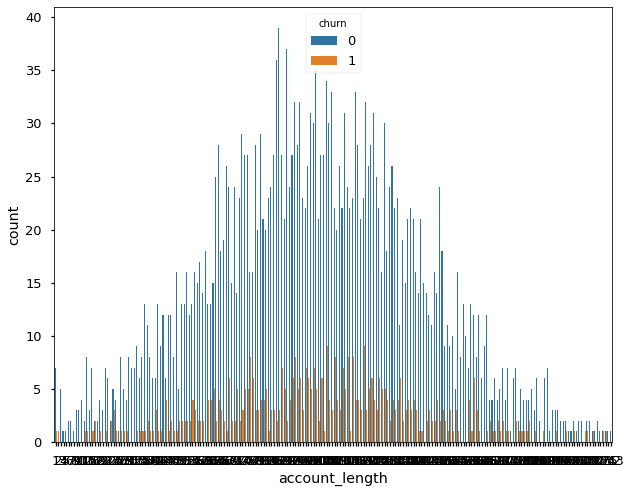

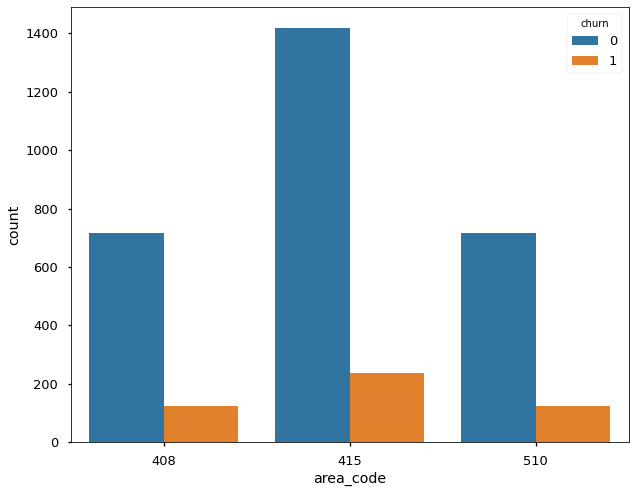

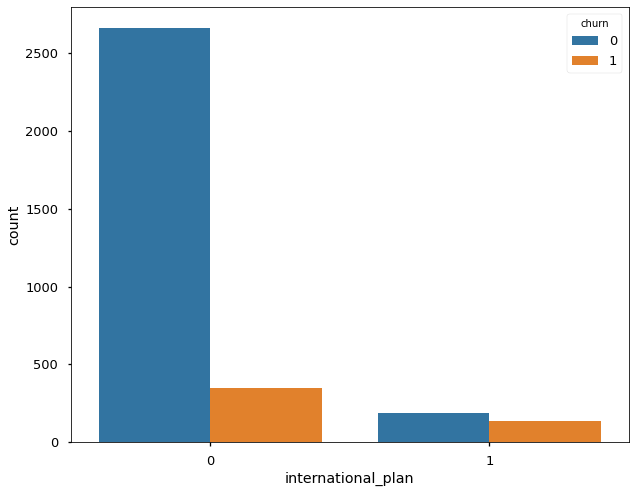

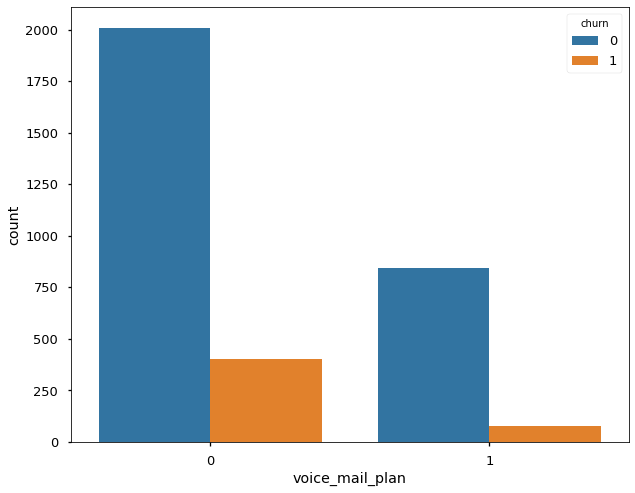

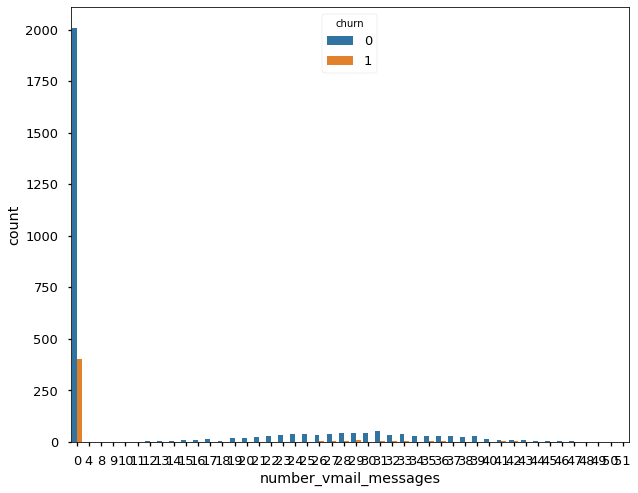

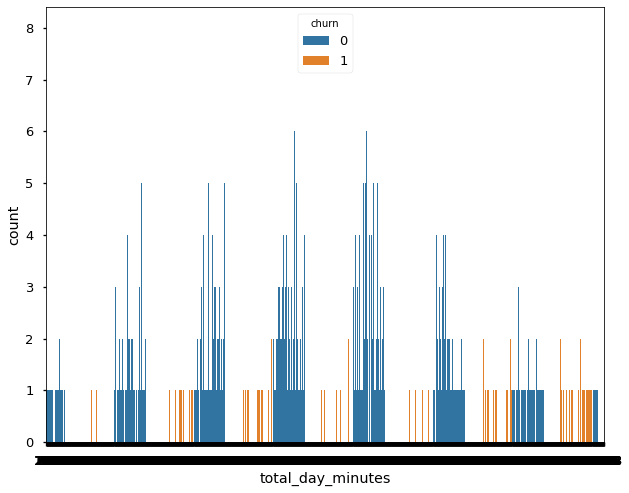

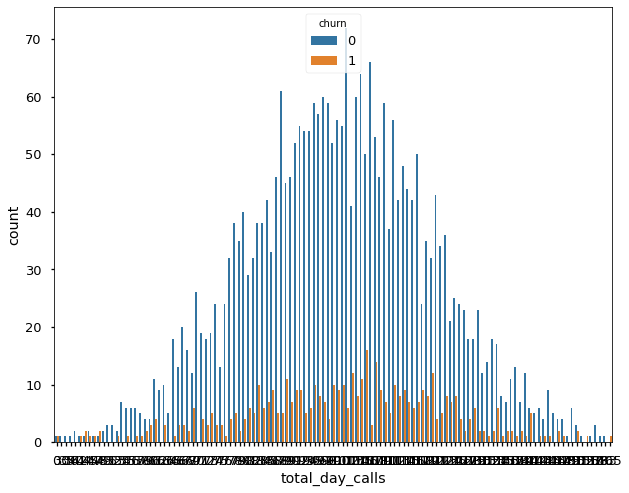

Error in callback <function flush_figures at 0x7fe1bea05a60> (for post_execute):


KeyboardInterrupt: 

In [30]:
# Plot the features in which hue is idenitfied as 'churn'

hue = df['churn']
dataplot = df.drop('churn', 1)
plot_data(hue, dataplot)

# Baseline Logistic Regression Model

In [865]:
# Quick look at our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [869]:
# Also looking at a dummy model with 5 cross validation folds.  Mean accuracy is about
# 86%.  This aligns with our assumption above with the imbalance of our churned 
# customer count.

dummy_model = DummyClassifier(strategy='most_frequent')

cv_results = cross_val_score(dummy_model, 
                             X_train, 
                             y_train, 
                             cv=5)

dummy_model.fit(X_train, y_train)

np.mean(cv_results)

0.8551422845691382

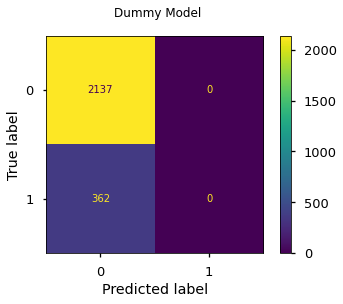

In [902]:
# Visualize dummy model confusion matrix

fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, 
                      X_train, 
                      y_train, 
                      ax=ax
                      );

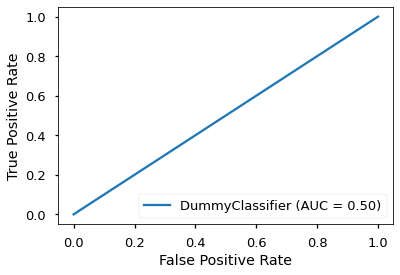

In [885]:
# Hallmark curve for dummy model

plot_roc_curve(dummy_model, X_train, y_train);

In [886]:
# Looking for similar values for target distribution roughly 85/15.

print("Train percent churn:", y_train.value_counts(normalize=True)[1])
print("Test percent churn: ", y_test.value_counts(normalize=True)[1])

Train percent churn: 0.1448579431772709
Test percent churn:  0.145083932853717


## Pipeline & Logistic Regression Model

In [890]:
# Labeling columns for different preprocessing steps

cat_columns = []

num_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
            'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
            'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
            'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'total_calls', 
            'total_minutes', 'price_per_minute'
           ]

binary_columns = ['international_plan', 'voice_mail_plan']

In [891]:
# import train_test 
from sklearn.model_selection import train_test_split

# situate target and non-target features
X = df.drop('churn', axis=1)
y = df['churn']

# create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [892]:
# Create subsets of the dataset representing binary, numerical and categorical data 
# to be able to preprocess them differently for modeling. \
X_train_binary = X_train[binary_columns]
X_train_nums = X_train[num_columns]
X_train_cats = X_train[cat_columns]

In [893]:
binary_preprocessing = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='most_frequent'))
])

numerical_preprocessing = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_preprocessing = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(drop='first', sparse=False))
])

#grab columns out of a pandas data frame and then apply a specified transformer.
preprocessor = ColumnTransformer(transformers=[
    ('binary_preprocess', binary_preprocessing, X_train_binary.columns),
    ('num_preprocess', numerical_preprocessing, X_train_nums.columns),
    ('cat_preprocess', categorical_preprocessing, X_train_cats.columns)] # remainder='passthrough'
)

In [894]:
# Baseline model 
baseline_logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", LogisticRegression(random_state=42))
])
    
# Train model
baseline_logreg.fit(X_train, y_train);

In [900]:
baseline_logreg.score(X_train, y_train)

0.8731492597038816

In [881]:
# This function plots confusion matrix (train), Roc_Auc curve as well as 
# cross validated, train and test roc_auc, recall, specificity and accuracy scores

def model_evaluation_roc_auc(model):
    with plt.style.context('seaborn-talk'):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

        # Plot confusion matrix for the test set
        plot_confusion_matrix(model, X_test, y_test, normalize = 'true', ax=ax1,  cmap = 'Blues') 
        ax1.grid(False) 
        ax1.set_title("Confusion Matrix - Train")
        
        # plot Roc curve for the test and train
        plot_roc_curve(model, X_train, y_train, ax=ax2, name ='Train ROC curve')
        plot_roc_curve(model, X_test, y_test, ax=ax2, name ='Test ROC curve' )
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('Receiver operating characteristic (ROC) Curve')
        plt.show()
        
        # Print classification Scores for the test set
        y_true = y_test
        y_pred = model.predict(X_test)
        divider = ('----' * 14) 
        table_title = 'Classification Report - Test:'
        table = classification_report(y_true, y_pred, digits=3)
        print('\n', divider, table_title, divider, table, divider, divider, '\n' , sep='\n') 
        
        # Print roc_auc for test and train 
        roc_score_train_cv = cross_val_score(estimator=model, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='roc_auc').mean()
        roc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) 
        roc_score_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        # Find Sensitivity and Specificity Scores:
        recall_score_train = recall_score(y_train, model.predict(X_train))
        recall_score_test = recall_score(y_test, model.predict(X_test))
        
        tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()
        specificity_score_train = tn / (tn+fp) 
        
        tn1, fp1, fn1, tp1 = confusion_matrix(y_test, model.predict(X_test)).ravel()
        specificity_score_test = tn1 / (tn1+fp1) 
        
        # Print accuracy for test and train 
        acc_score_train = accuracy_score(y_train, model.predict(X_train)) 
        acc_score_test = accuracy_score(y_test, model.predict(X_test))
        
        print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
        print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
        print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
        print('\n', divider, divider, '\n' , sep='\n')
        
        print(f" Train Accuracy Score: {acc_score_train :.2%}")  
        print(f" Test Accuracy Score: {acc_score_test :.2%}")    
        print('\n', divider, divider, '\n' , sep='\n')
        
        print(f" Train Sensitivity/Recall score: {recall_score_train :.2%}")    
        print(f" Test Sensitivity/Recall score: {recall_score_test :.2%}")  
        print('\n', divider, divider, '\n' , sep='\n')
        
        print(f" Train Specificity score: {specificity_score_train :.2%}")    
        print(f" Test Specificity Score: {specificity_score_test :.2%}")   
        print('\n', divider, divider, '\n' , sep='\n')
        

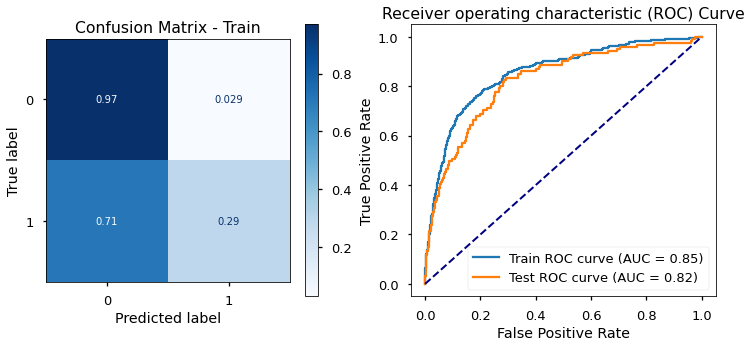



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.889     0.971     0.928       713
           1      0.625     0.289     0.395       121

    accuracy                          0.872       834
   macro avg      0.757     0.630     0.662       834
weighted avg      0.851     0.872     0.851       834

--------------------------------------------------------
--------------------------------------------------------


 Mean Cross Validated Roc_Auc Score: 84.56%
 Train Roc_Auc Score: 85.32%
 Test Roc_Auc Score: 82.10%


--------------------------------------------------------
--------------------------------------------------------


 Train Accuracy Score: 87.31%
 Test Accuracy Score: 87.17%


--------------------------------------------------------
--------------------------------------------------------


 Train Sensitiv

In [882]:

model_evaluation_roc_auc(baseline_logreg)

In [803]:
# There should be two underscores between estimator name and it's parameters in a Pipeline

parameters = {
    'estimator__penalty' : ['l1','l2'], # default = l2 elasticnet is both
    'estimator__fit_intercept':[True, False],
    'estimator__C'       : [0.001,0.01,0.1,0.5,1,10,100], #np.logspace(-3,3,7) # default=1.0
    'estimator__solver'  : ['newton-cg', 'lbfgs', 'liblinear'], # default = ’lbfgs’
    'estimator__max_iter'  : [50,100,200,300]  # default = 100
}
      
# Create the grid, with "logreg_pipeline" as the estimator
best_logreg = GridSearchCV(estimator = baseline_logreg,   # model
                          param_grid = parameters,     # hyperparameters
                          scoring ='roc_auc',          # metric for scoring
                          cv = 5,                      # number of folds for cross-validation
                          n_jobs = -1                  # 1 job per core of the computer.
)                      



In [804]:
# Train the pipeline (tranformations & predictor)
best_logreg.fit(X_train, y_train);
best_logreg.best_params_

{'estimator__C': 0.5,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 50,
 'estimator__penalty': 'l1',
 'estimator__solver': 'liblinear'}

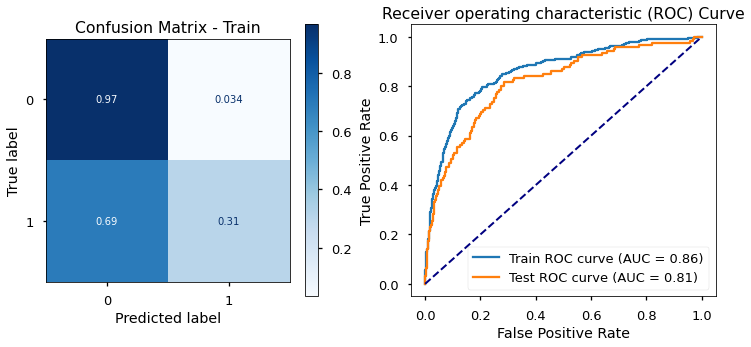



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.891     0.966     0.927       713
           1      0.607     0.306     0.407       121

    accuracy                          0.871       834
   macro avg      0.749     0.636     0.667       834
weighted avg      0.850     0.871     0.852       834

--------------------------------------------------------
--------------------------------------------------------


 Mean Cross Validated Roc_Auc Score: 83.98%
 Train Roc_Auc Score: 85.87%
 Test Roc_Auc Score: 81.43%


--------------------------------------------------------
--------------------------------------------------------


 Train Accuracy Score: 88.00%
 Test Accuracy Score: 87.05%


--------------------------------------------------------
--------------------------------------------------------


 Train Sensitiv

In [805]:
model_evaluation_roc_auc(best_logreg.best_estimator_)

# Build KNN Model

In [157]:
# import class
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
# Relevant imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Perform cross-validation
knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

knn_baseline_log_loss

1.1238999517038402

In [159]:
# Your code here (add more cells as needed)
# Adjusting the neighbors value to see if we are overfitting with the default = 5.
knn_second_model = KNeighborsClassifier(n_neighbors=25)

knn_second_log_loss = -cross_val_score(knn_second_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_second_log_loss

0.454726724156682

In [160]:
# Your code here (add more cells as needed)
# Changing from Euclidean difference to manhattan difference
knn_3_model = KNeighborsClassifier(n_neighbors=25, metric="manhattan")

knn_3_log_loss = -cross_val_score(knn_3_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_3_log_loss

0.43796041887576437

In [162]:
# Adjusting the number of neighbors once again to see if we can increase performance.
knn_4_model = KNeighborsClassifier(n_neighbors=40, metric="manhattan")

knn_4_log_loss = -cross_val_score(knn_4_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_4_log_loss

0.3389903269381906

In [163]:
# Backtracking to see what increased neighbors looks like with Euclidean distance.
knn_5_model = KNeighborsClassifier(n_neighbors=40)

knn_5_log_loss = -cross_val_score(knn_5_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_5_log_loss

0.3817795287387321

In [164]:
# Backtracking to see what increased neighbors looks like with Euclidean distance.
knn_6_model = KNeighborsClassifier(n_neighbors=15)

knn_6_log_loss = -cross_val_score(knn_6_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_6_log_loss

0.5986107525614939

# Build Decision Tree Model

# Random Forest

# Build Another Model (XGBoost, other?)

# Model Evalution

# Final Model